## Part One:

### Introduction/Business Problem:
    Being one of best spots to feel both the majestic taste of the east and the modernity of the west, with more than 15 million foreign visitors in 2019. Accommodation is a crucial part of the traveling process, usually tourists spend some time looking for the best option, whether staying in a hotel or renting an apartment using services like Airbnb, the area has also to be convenient to stay in, where historical and entertainment places are accessible. Another crucial point is the price, depending on the budget goes choosing the accommodation type and place. In this project, I will try to help accelerating the decision process by providing all the needed information derived from hotels around Istanbul and Airbnb renting data for tourists to weight and have an holistic overview of all possible options.
    
### Data Discribtion:
    In this project I will be using two sources of data, first is the Forsquare location data to get the name of the hotels and the boroughs they belong to in the first step, then deriving the most common venues in each borough. To get the complete picture, I will be using Airbnb data, to get the prices and both latitude and longitude of each presented unit. For example, Istanbul has 39 borough and a touristic could be Fatih, so first we will be using Forsquare to get the hotels in this part of the city and then get the common venues like restaurants, cafes, and museums. In the next step the Airbnb rentals will be added to the equation, how much does each cost and its type alongside other details derived from Airbnb Istanbul of 2019 dataset.

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium

import pandas_profiling


import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans        



import requests # library to handle requests
import random # library for random number generation


from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

In [8]:
df = pd.read_csv("/Users/aymanamer/Downloads/AirbnbIstanbul.csv")
df.head()

id                                 name  host_id host_name  \
0   4826                            The Place     6603      Kaan   
1  20815    The Bosphorus from The Comfy Hill    78838    Gülder   
2  25436  House for vacation rental furnutare   105823     Yesim   
3  27271      LOVELY APT. IN PERFECT LOCATION   117026     Mutlu   
4  28277       Duplex Apartment with Terrace    121607      Alen   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN       Uskudar  41.05650   29.05367  Entire home/apt   
1                  NaN      Besiktas  41.06984   29.04545  Entire home/apt   
2                  NaN      Besiktas  41.07731   29.03891  Entire home/apt   
3                  NaN       Beyoglu  41.03220   28.98216  Entire home/apt   
4                  NaN         Sisli  41.04471   28.98567  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    554               1                  1  2009-06-01               0.01   
1    100              30                 41  2018-11-07               0.38   
2    211              21                  0         NaN                NaN   
3    237               5                  2  2018-05-04               0.04   
4    591               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               1               365  
1                               2                49  
2                               1                83  
3                               1               228  
4                              13               356

In [9]:
df.drop(['host_name', 'neighbourhood_group', 'last_review', 'reviews_per_month', 'availability_365' ,'calculated_host_listings_count'], axis=1, inplace=True)
df.head()

id                                 name  host_id neighbourhood  \
0   4826                            The Place     6603       Uskudar   
1  20815    The Bosphorus from The Comfy Hill    78838      Besiktas   
2  25436  House for vacation rental furnutare   105823      Besiktas   
3  27271      LOVELY APT. IN PERFECT LOCATION   117026       Beyoglu   
4  28277       Duplex Apartment with Terrace    121607         Sisli   

   latitude  longitude        room_type  price  minimum_nights  \
0  41.05650   29.05367  Entire home/apt    554               1   
1  41.06984   29.04545  Entire home/apt    100              30   
2  41.07731   29.03891  Entire home/apt    211              21   
3  41.03220   28.98216  Entire home/apt    237               5   
4  41.04471   28.98567  Entire home/apt    591               3   

   number_of_reviews  
0                  1  
1                 41  
2                  0  
3                  2  
4                  0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16251 entries, 0 to 16250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 16251 non-null  int64  
 1   name               16160 non-null  object 
 2   host_id            16251 non-null  int64  
 3   neighbourhood      16251 non-null  object 
 4   latitude           16251 non-null  float64
 5   longitude          16251 non-null  float64
 6   room_type          16251 non-null  object 
 7   price              16251 non-null  int64  
 8   minimum_nights     16251 non-null  int64  
 9   number_of_reviews  16251 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.2+ MB


In [11]:
profile = pandas_profiling.ProfileReport(df)
profile

In [48]:
neighbourhood_price = df.groupby("neighbourhood")["price"].agg(['mean'])
neighbourhood_price.head()

mean
neighbourhood            
Adalar         406.598765
Arnavutkoy     533.285714
Atasehir       303.616279
Avcilar        180.584746
Bagcilar       388.978022

In [18]:
url = 'https://raw.githubusercontent.com/Srcanyildiz/istanbul/master/istanbul_geo.csv'

df2 = pd.read_csv(url)

df2.head()

Borough  Avg-HousePrice  Latitude  Longitude
0      Adalar            5568   40.8619    29.1208
1  Arnavutkoy            2265   41.1956    28.7352
2    Atasehir            5512   40.9831    29.1279
3     Avcilar            2454   40.9880    28.7170
4    Bagcilar            3264   41.0450    28.8338

In [19]:
df2.drop(['Avg-HousePrice'], axis=1, inplace=True)
df2.head()

Borough  Latitude  Longitude
0      Adalar   40.8619    29.1208
1  Arnavutkoy   41.1956    28.7352
2    Atasehir   40.9831    29.1279
3     Avcilar   40.9880    28.7170
4    Bagcilar   41.0450    28.8338

In [50]:
df3= neighbourhood_price.rename(columns={'neighbourhood':'Borough'})
df3.head()

mean
neighbourhood            
Adalar         406.598765
Arnavutkoy     533.285714
Atasehir       303.616279
Avcilar        180.584746
Bagcilar       388.978022

In [60]:
istanbulmerged= pd.merge(df2, neighbourhood_price, left_on='Borough', right_on='neighbourhood')

In [61]:
istanbulmerged.head()

Borough  Latitude  Longitude        mean
0      Adalar   40.8619    29.1208  406.598765
1  Arnavutkoy   41.1956    28.7352  533.285714
2    Atasehir   40.9831    29.1279  303.616279
3     Avcilar   40.9880    28.7170  180.584746
4    Bagcilar   41.0450    28.8338  388.978022

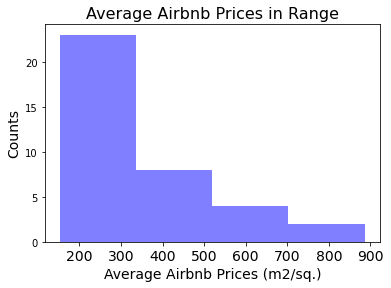

In [67]:
num_bins = 4
n, bins, patches = plt.hist(istanbulmerged['mean'], num_bins, facecolor='blue', alpha=0.5)
plt.title("Average Airbnb Prices in Range",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Average Airbnb Prices (m2/sq.)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

0-300
300-500
500-700
700- more

In [70]:
level = []
for i in range(0,len(istanbulmerged)):
    if (istanbulmerged['mean'][i] < 300):
        level.append("Very Cheap")
    elif (istanbulmerged['mean'][i] >= 300 and istanbulmerged['mean'][i] < 500):
        level.append("Cheap")
    elif (istanbulmerged['mean'][i] >= 500 and istanbulmerged['mean'][i] < 700):
        level.append("Reasonable")
    else:
        level.append("Premium")   

istanbulmerged['Level_labels'] = level
istanbulmerged.head()

Borough  Latitude  Longitude        mean Level_labels
0      Adalar   40.8619    29.1208  406.598765        Cheap
1  Arnavutkoy   41.1956    28.7352  533.285714   Reasonable
2    Atasehir   40.9831    29.1279  303.616279        Cheap
3     Avcilar   40.9880    28.7170  180.584746   Very Cheap
4    Bagcilar   41.0450    28.8338  388.978022        Cheap

In [4]:
CLIENT_ID = '5XTFDVQMFVBSFAZSPQR113DGD5SNZZS5JVMNEFLVARPALJIL' # your Foursquare ID
CLIENT_SECRET = '0BNAXWUOOVOEBUGHBSOOVMBBVYT31PCRRPJDGXDBH41Y4SKK' # your Foursquare Secret
ACCESS_TOKEN = 'IKKNOEBU0PY0WGCXLJQUGXUH5IU45IXDVZ0GAHVICCGOAYCH' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 3000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5XTFDVQMFVBSFAZSPQR113DGD5SNZZS5JVMNEFLVARPALJIL
CLIENT_SECRET:0BNAXWUOOVOEBUGHBSOOVMBBVYT31PCRRPJDGXDBH41Y4SKK


In [5]:
address = 'Istanbul, Turkey'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

41.0096334 28.9651646


In [6]:
map_istanbul = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_istanbul)  
    
map_istanbul

In [74]:
borough_latitude = istanbulmerged.loc[0, 'Latitude'] # neighborhood latitude value
borough_longitude = istanbulmerged.loc[0, 'Longitude'] # neighborhood longitude value

borough_name = istanbulmerged.loc[0, 'Borough'] # neighborhood name

In [75]:
LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=5XTFDVQMFVBSFAZSPQR113DGD5SNZZS5JVMNEFLVARPALJIL&client_secret=0BNAXWUOOVOEBUGHBSOOVMBBVYT31PCRRPJDGXDBH41Y4SKK&v=20180604&ll=40.8619,29.1208&radius=750&limit=100'

In [76]:
results = requests.get(url).json()

In [77]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [78]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-78-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


name       categories        lat        lng
0            Büyükada Tepesi         Mountain  40.861107  29.117418
1       Eski Rum Yetimhanesi    Historic Site  40.861705  29.123323
2  Büyükada Bisiklet Parkuru       Bike Trail  40.865000  29.116861
3        Büyükada Lale köşkü  Bed & Breakfast  40.865657  29.125223
4     Aşıklar butik by şükrü            Hotel  40.862570  29.118003

In [79]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

40 venues were returned by Foursquare.


In [80]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [82]:
istanbul_venues = getNearbyVenues(names=istanbulmerged['Borough'],
                                   latitudes=istanbulmerged['Latitude'],
                                   longitudes=istanbulmerged['Longitude']
                                  )

Adalar
Arnavutkoy
Atasehir
Avcilar
Bagcilar
Bahcelievler
Bakirkoy
Basaksehir
Bayrampasa
Besiktas
Beykoz
Beylikduzu
Beyoglu
Catalca
Cekmekoy
Esenler
Esenyurt
Eyup
Fatih
Gaziosmanpasa
Gungoren
Kadikoy
Kagithane
Kartal
Maltepe
Pendik
Sancaktepe
Sariyer
Silivri
Sultanbeyli
Sultangazi
Sile
Sisli
Tuzla
Umraniye
Uskudar
Zeytinburnu


In [83]:
print(istanbul_venues.shape)
istanbul_venues.head()

(1735, 7)


Borough  Borough Latitude  Borough Longitude                      Venue  \
0  Adalar           40.8619            29.1208            Büyükada Tepesi   
1  Adalar           40.8619            29.1208       Eski Rum Yetimhanesi   
2  Adalar           40.8619            29.1208     Aşıklar butik by şükrü   
3  Adalar           40.8619            29.1208  Büyükada Bisiklet Parkuru   
4  Adalar           40.8619            29.1208  Nizam Butik Otel & Bistro   

   Venue Latitude  Venue Longitude   Venue Category  
0       40.861107        29.117418         Mountain  
1       40.861705        29.123323    Historic Site  
2       40.862570        29.118003            Hotel  
3       40.865000        29.116861       Bike Trail  
4       40.863322        29.116257  Bed & Breakfast

In [84]:
summary = istanbul_venues.groupby('Borough').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

Borough  Count
0      Pendik     10
1  Arnavutkoy     13
2      Adalar     14
3       Tuzla     14
4  Beylikduzu     19

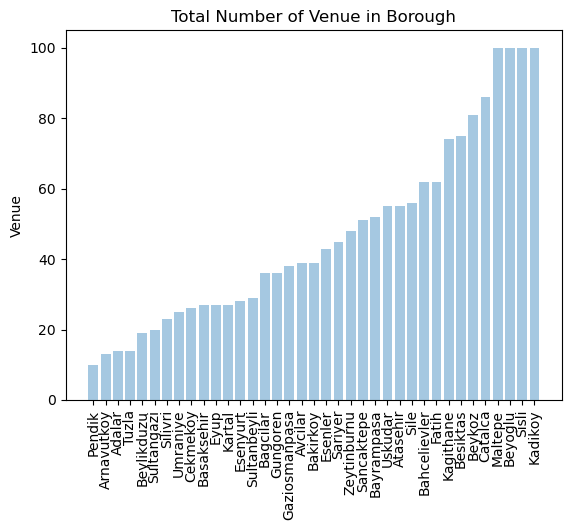

In [85]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Borough
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Borough')
plt.xticks(rotation=90)

plt.show()

In [86]:
print('There are {} uniques categories.'.format(len(istanbul_venues['Venue Category'].unique())))

There are 250 uniques categories.


In [87]:
# one hot encoding
istanbul_onehot = pd.get_dummies(istanbul_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
istanbul_onehot['Borough'] = istanbul_venues['Borough'] 

# move neighborhood column to the first column
list_column = istanbul_onehot.columns.tolist()
number_column = int(list_column.index('Borough'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
istanbul_onehot = istanbul_onehot[list_column]

istanbul_onehot.head()

Borough  Accessories Store  American Restaurant  Antique Shop  Aquarium  \
0  Adalar                  0                    0             0         0   
1  Adalar                  0                    0             0         0   
2  Adalar                  0                    0             0         0   
3  Adalar                  0                    0             0         0   
4  Adalar                  0                    0             0         0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   ...  Volleyball Court  Warehouse Store  Water Park  Waterfront  Whisky Bar  \
0  ...                 0                0           0           0           0   
1  ...                 0                0           0           0           0   
2  ...                 0                0           0           0           0   
3  ...                 0                0           0           0           0   
4  ...                 0                0           0           0           0   

   Wine Bar  Wings Joint  Women's Store  Yoga Studio  Çöp Şiş Place  
0         0            0              0            0              0  
1         0            0              0            0              0  
2         0            0              0            0              0  
3         0            0              0            0              0  
4         0            0              0            0              0  

[5 rows x 251 columns]

In [88]:
istanbul_grouped = istanbul_onehot.groupby('Borough').mean().reset_index()
istanbul_grouped.head()

Borough  Accessories Store  American Restaurant  Antique Shop  Aquarium  \
0      Adalar           0.000000                  0.0           0.0       0.0   
1  Arnavutkoy           0.000000                  0.0           0.0       0.0   
2    Atasehir           0.018182                  0.0           0.0       0.0   
3     Avcilar           0.000000                  0.0           0.0       0.0   
4    Bagcilar           0.000000                  0.0           0.0       0.0   

     Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0  0.000000               0.0                     0.0     0.000000   
1  0.076923               0.0                     0.0     0.000000   
2  0.000000               0.0                     0.0     0.018182   
3  0.025641               0.0                     0.0     0.000000   
4  0.000000               0.0                     0.0     0.000000   

   Art Museum  ...  Volleyball Court  Warehouse Store  Water Park  Waterfront  \
0         0.0  ...               0.0              0.0    0.000000         0.0   
1         0.0  ...               0.0              0.0    0.000000         0.0   
2         0.0  ...               0.0              0.0    0.018182         0.0   
3         0.0  ...               0.0              0.0    0.000000         0.0   
4         0.0  ...               0.0              0.0    0.000000         0.0   

   Whisky Bar  Wine Bar  Wings Joint  Women's Store  Yoga Studio  \
0         0.0       0.0     0.000000            0.0          0.0   
1         0.0       0.0     0.000000            0.0          0.0   
2         0.0       0.0     0.000000            0.0          0.0   
3         0.0       0.0     0.000000            0.0          0.0   
4         0.0       0.0     0.027778            0.0          0.0   

   Çöp Şiş Place  
0       0.000000  
1       0.000000  
2       0.018182  
3       0.000000  
4       0.000000  

[5 rows x 251 columns]

In [89]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [90]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = istanbul_grouped['Borough']

for ind in np.arange(istanbul_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(istanbul_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()

Borough 1st Most Common Venue 2nd Most Common Venue  \
0      Adalar                  Café                 Hotel   
1  Arnavutkoy         Shopping Mall              Bus Stop   
2    Atasehir                  Café  Gym / Fitness Center   
3     Avcilar                  Café                 Hotel   
4    Bagcilar                  Café    Turkish Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0              Mountain            Bike Trail       Bed & Breakfast   
1   Leather Goods Store                 Diner                Arcade   
2                   Spa    Basketball Stadium        Soccer Stadium   
3        Clothing Store    Turkish Restaurant        Cosmetics Shop   
4          Carpet Store      Kebab Restaurant                   Gym   

        6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                    Tea Room             BBQ Joint                  Road   
1  Construction & Landscaping              Pharmacy     Convenience Store   
2                Soccer Field           Coffee Shop                  Park   
3                       Diner    Dim Sum Restaurant     Mobile Phone Shop   
4               Boat or Ferry              Boutique                Mosque   

        9th Most Common Venue 10th Most Common Venue  
0                      Forest          Garden Center  
1               Big Box Store             Restaurant  
2                       Hotel             Restaurant  
3  Modern European Restaurant             Restaurant  
4                  Soup Place                 Buffet

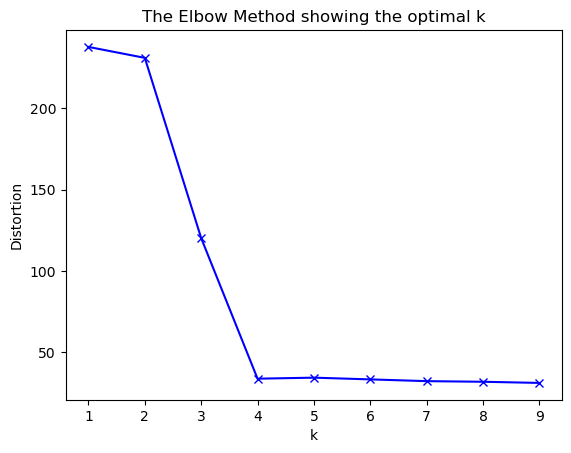

In [91]:
istanbul_grouped_clustering = istanbul_grouped.drop('Borough', 1)


from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(istanbul_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(istanbul_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / istanbul_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [92]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(istanbul_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [93]:
istanbulmergedvenues = istanbulmerged

# add clustering labels
istanbulmergedvenues['Cluster Labels'] = kmeans.labels_

istanbulmergedvenues = istanbulmergedvenues.join(boroughs_venues_sorted.set_index('Borough'), on='Borough')

istanbulmergedvenues.head(17) # check the last columns!

Borough  Latitude  Longitude        mean Level_labels  \
0         Adalar   40.8619    29.1208  406.598765        Cheap   
1     Arnavutkoy   41.1956    28.7352  533.285714   Reasonable   
2       Atasehir   40.9831    29.1279  303.616279        Cheap   
3        Avcilar   40.9880    28.7170  180.584746   Very Cheap   
4       Bagcilar   41.0450    28.8338  388.978022        Cheap   
5   Bahcelievler   40.9976    28.8500  188.822581   Very Cheap   
6       Bakirkoy   40.9835    28.8679  277.710660   Very Cheap   
7     Basaksehir   41.0969    28.7718  415.374046        Cheap   
8     Bayrampasa   41.0477    28.8992  596.444444   Reasonable   
9       Besiktas   41.0469    29.0078  299.486467   Very Cheap   
10        Beykoz   41.0936    29.0879  855.977273      Premium   
11    Beylikduzu   40.9847    28.6425  224.385714   Very Cheap   
12       Beyoglu   41.0300    28.9748  373.177150        Cheap   
13       Catalca   41.1428    28.4616  885.666667      Premium   
14      Cekmekoy   41.0423    29.1778  232.833333   Very Cheap   
15       Esenler   41.0540    28.8722  231.111111   Very Cheap   
16      Esenyurt   41.0316    28.6622  403.129630        Cheap   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                1                  Café                 Hotel   
1                2         Shopping Mall              Bus Stop   
2                1                  Café  Gym / Fitness Center   
3                0                  Café                 Hotel   
4                1                  Café    Turkish Restaurant   
5                1    Turkish Restaurant                  Café   
6                1                   Gym    Turkish Restaurant   
7                0                  Café          Dessert Shop   
8                2        Clothing Store   Sporting Goods Shop   
9                1           Coffee Shop                  Café   
10               1                  Café    Turkish Restaurant   
11               1            Steakhouse     Accessories Store   
12               1                 Hotel            Restaurant   
13               1                  Café     Mobile Phone Shop   
14               1         Garden Center            Steakhouse   
15               1                  Café    Turkish Restaurant   
16               1                  Café      Kebab Restaurant   

    3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
0                Mountain               Bike Trail       Bed & Breakfast   
1     Leather Goods Store                    Diner                Arcade   
2                     Spa       Basketball Stadium        Soccer Stadium   
3          Clothing Store       Turkish Restaurant        Cosmetics Shop   
4            Carpet Store         Kebab Restaurant                   Gym   
5        Kebab Restaurant               Steakhouse            Restaurant   
6                    Park       Athletics & Sports             Bookstore   
7                  Bakery              Pizza Place     Electronics Store   
8              Restaurant            Shopping Mall                   Gym   
9   Performing Arts Venue           Chocolate Shop          Burger Joint   
10             Restaurant             Dessert Shop        Breakfast Spot   
11          Jewelry Store  Comfort Food Restaurant                  Pool   
12                   Café              Art Gallery           Coffee Shop   
13     Turkish Restaurant               Restaurant           Pizza Place   
14            Music Venue                     Café            Restaurant   
15                 Arcade                     Park            Soup Place   
16             Restaurant           Clothing Store                  Park   

         6th Most Common Venue            7th Most Common Venue  \
0                     Tea Room                        BBQ Joint   
1   Construction & Landscaping                         Pharmacy   
2                 Soccer Field                      Coffee Sh

In [96]:
count_venue = istanbulmergedvenues
count_venue = count_venue.drop(['Borough','mean', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue  Café  Cigkofte Place  Clothing Store  Coffee Shop  \
0                         3               0               0            0   
1                        21               1               1            2   
2                         1               0               1            0   

1st Most Common Venue  Garden Center  Gym  Hotel  Shopping Mall  Steakhouse  \
0                                  0    0      0              0           0   
1                                  1    1      1              0           1   
2                                  0    0      0              1           0   

1st Most Common Venue  Turkish Restaurant  
0                                       0  
1                                       2  
2                                       0

Text(0, 0.5, 'Clusters')

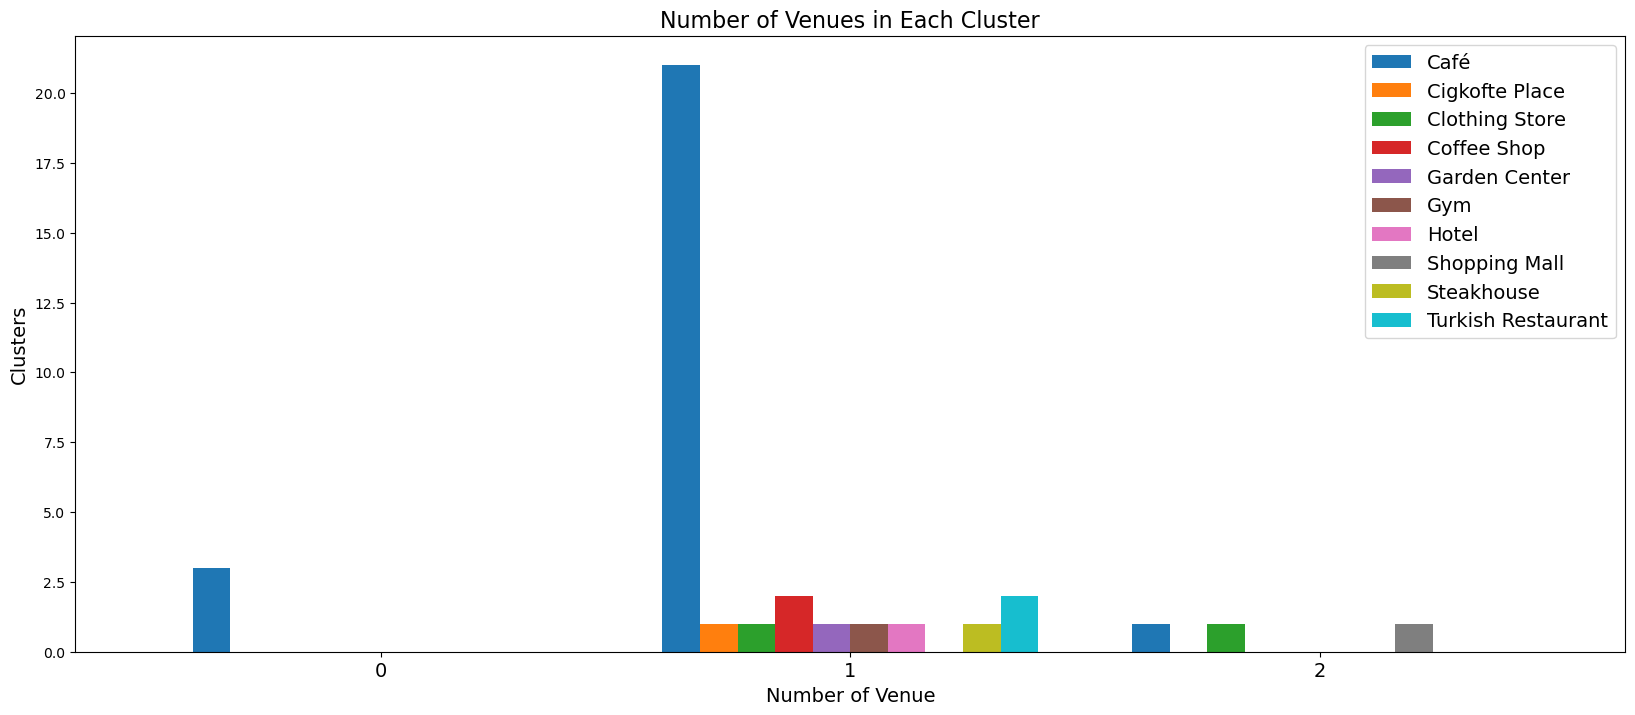

In [97]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

In [101]:
Cluster_labels = {'Clusters': [0,1,2], 'Labels': ["Cafe Venues","Various Social Venues","Shopping Centers"]}
Cluster_labels = pd.DataFrame(data=Cluster_labels)
Cluster_labels

Clusters                 Labels
0         0            Cafe Venues
1         1  Various Social Venues
2         2       Shopping Centers

In [103]:
data_process = istanbulmerged.sort_values('mean').reset_index(drop=True)
data_process = data_process.drop(['Latitude', 'Longitude'], axis=1)
data_process.head()

Borough        mean Level_labels  Cluster Labels
0       Pendik  153.506944   Very Cheap               1
1   Sancaktepe  160.266667   Very Cheap               1
2  Sultanbeyli  178.705882   Very Cheap               1
3      Avcilar  180.584746   Very Cheap               0
4     Umraniye  183.919118   Very Cheap               1

In [104]:
top3 = istanbul_venues.groupby(['Borough','Venue Category']).size().reset_index(name='Counts')
top3 = top3.sort_values(['Borough','Counts'],ascending=False).groupby('Borough').head(3).reset_index(drop=True)

top3['Join'] = top3['Counts'].map(str) + " " + top3['Venue Category']
top3 = top3.groupby(['Borough'])['Join'].apply(", ".join).reset_index()

top3.head()

Borough                                               Join
0      Adalar                       2 Café, 2 Hotel, 1 BBQ Joint
1  Arnavutkoy         3 Shopping Mall, 1 Arcade, 1 Big Box Store
2    Atasehir  4 Café, 3 Gym / Fitness Center, 2 Basketball S...
3     Avcilar                 15 Café, 2 Clothing Store, 2 Hotel
4    Bagcilar       5 Café, 3 Carpet Store, 3 Turkish Restaurant

In [106]:
import numpy as np

result = pd.merge(istanbulmergedvenues, 
                    top3[['Borough', 'Join']],
                    left_on = 'Borough',
                    right_on = 'Borough',
                    how = 'left')
result= pd.merge(result, 
                    Cluster_labels[['Clusters', 'Labels']],
                    left_on = 'Cluster Labels',
                    right_on = 'Clusters',
                    how = 'left')
result = pd.merge(result, 
                    istanbulmerged[['Borough', 'Level_labels']],
                    left_on = 'Borough',
                    right_on = 'Borough',
                    how = 'left')

result = result.drop(['Clusters'], axis=1)
result.head(3)

Borough  Latitude  Longitude        mean Level_labels_x  Cluster Labels  \
0      Adalar   40.8619    29.1208  406.598765          Cheap               1   
1  Arnavutkoy   41.1956    28.7352  533.285714     Reasonable               2   
2    Atasehir   40.9831    29.1279  303.616279          Cheap               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Café                 Hotel              Mountain   
1         Shopping Mall              Bus Stop   Leather Goods Store   
2                  Café  Gym / Fitness Center                   Spa   

  4th Most Common Venue 5th Most Common Venue       6th Most Common Venue  \
0            Bike Trail       Bed & Breakfast                    Tea Room   
1                 Diner                Arcade  Construction & Landscaping   
2    Basketball Stadium        Soccer Stadium                Soccer Field   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0             BBQ Joint                  Road                Forest   
1              Pharmacy     Convenience Store         Big Box Store   
2           Coffee Shop                  Park                 Hotel   

  10th Most Common Venue                                               Join  \
0          Garden Center                       2 Café, 2 Hotel, 1 BBQ Joint   
1             Restaurant         3 Shopping Mall, 1 Arcade, 1 Big Box Store   
2             Restaurant  4 Café, 3 Gym / Fitness Center, 2 Basketball S...   

                  Labels Level_labels_y  
0  Various Social Venues          Cheap  
1       Shopping Centers     Reasonable  
2  Various Social Venues          Cheap

In [108]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['Latitude'], result['Longitude'], result['Borough'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels_x']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color= rainbow[cluster_number-1],
        popup=label,
        fill_color = rainbow[cluster_number-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters